In [125]:
import torch
from cpclasses import *



In [126]:
class Model(torch.nn.Module):
    def __init__(self, n_features=1, n_classes=3):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_features, n_classes, bias=True)
        self.n_features = n_features
        self.n_classes = n_classes
        
    def forward(self,x):
        x = x.view(-1, self.n_features)
        x = self.fc1(x)
        return x

    def predict_label(self, x):

        predicted_weights = self(x)
        predicted_probabilities = torch.nn.functional.softmax(predicted_weights, dim=1)
        predicted_label = torch.argmax(predicted_probabilities, dim=1)
        return predicted_label


    def fit(self, n_epochs, data_list, labels_list):
        criterion = torch.nn.CrossEntropyLoss()


        n_epochs = 1000
        optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

        for epoch in range(n_epochs):
            optimizer.zero_grad()
            predicted_weights = model(data_list)
            labels = torch.tensor(labels_list, dtype = int)
            loss = criterion(predicted_weights, label)
            loss.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, loss: {loss.item()}')

        print('Optimization finished with loss: ', loss.item()) 

In [127]:
model = Model()
model.fc1.weight.data[...] = torch.Tensor([[0.7], [0.25], [0.9]])
model.fc1.bias.data[...] = torch.Tensor([1, -0.4, 0.5])

In [128]:
for name, parameters in model.named_parameters():
    print(name,parameters)

fc1.weight Parameter containing:
tensor([[0.7000],
        [0.2500],
        [0.9000]], requires_grad=True)
fc1.bias Parameter containing:
tensor([ 1.0000, -0.4000,  0.5000], requires_grad=True)


In [129]:
test_P = torch.linspace(-6, 6, 7)
test_P

tensor([-6., -4., -2.,  0.,  2.,  4.,  6.])

In [130]:
predicted_weights = model(test_P)
predicted_weights

tensor([[-3.2000, -1.9000, -4.9000],
        [-1.8000, -1.4000, -3.1000],
        [-0.4000, -0.9000, -1.3000],
        [ 1.0000, -0.4000,  0.5000],
        [ 2.4000,  0.1000,  2.3000],
        [ 3.8000,  0.6000,  4.1000],
        [ 5.2000,  1.1000,  5.9000]], grad_fn=<AddmmBackward0>)

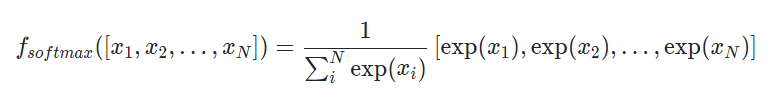

In [131]:
def f(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)

predicted_probabilities = f(predicted_weights)
predicted_probabilities

tensor([[0.2061, 0.7562, 0.0377],
        [0.3617, 0.5397, 0.0986],
        [0.4967, 0.3013, 0.2020],
        [0.5396, 0.1331, 0.3273],
        [0.4987, 0.0500, 0.4513],
        [0.4183, 0.0171, 0.5646],
        [0.3300, 0.0055, 0.6645]], grad_fn=<DivBackward0>)

In [132]:
predicted_probabilities = torch.softmax(predicted_weights, dim=1)
predicted_probabilities

tensor([[0.2061, 0.7562, 0.0377],
        [0.3617, 0.5397, 0.0986],
        [0.4967, 0.3013, 0.2020],
        [0.5396, 0.1331, 0.3273],
        [0.4987, 0.0500, 0.4513],
        [0.4183, 0.0171, 0.5646],
        [0.3300, 0.0055, 0.6645]], grad_fn=<SoftmaxBackward0>)

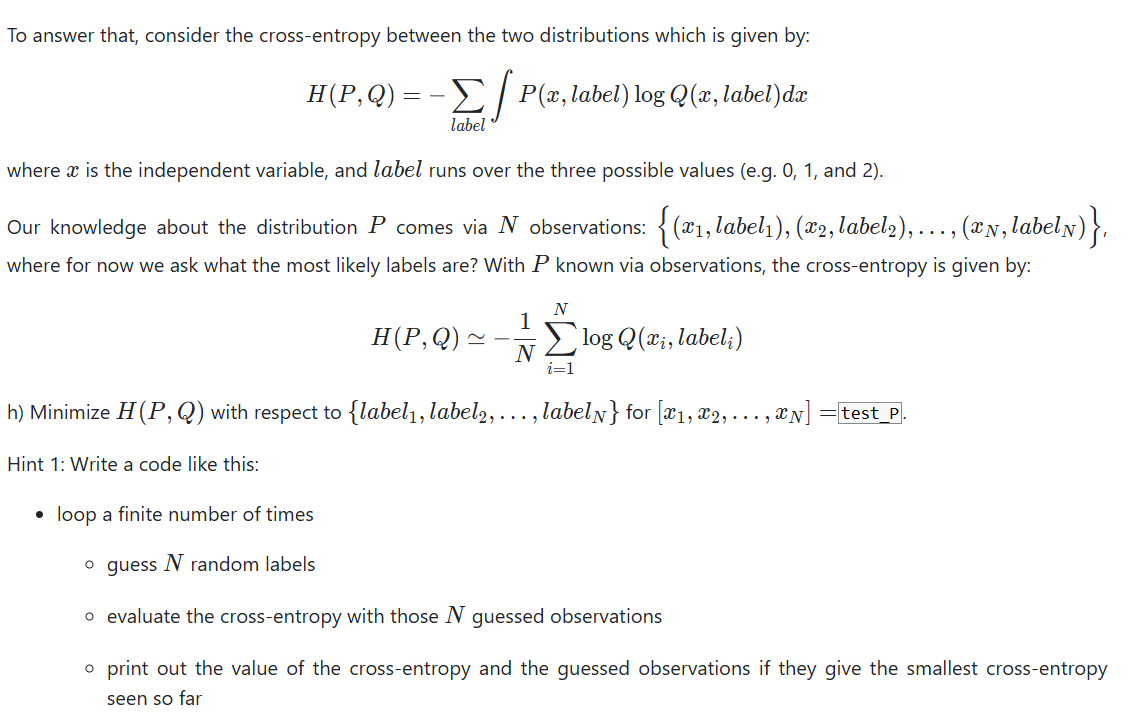

In [133]:
N_labels = 7
epochs = 10000
min_H = 100
for epoch in range(epochs):
    labels = torch.randint(0, 3, (N_labels,))
    H = 0
    for i in range(len(labels)):
        H += torch.log(predicted_probabilities[i][labels[i]])
    H = -1/len(labels) * H
    if H < min_H:
        min_H = H
        print(f'{H:.4f}, {labels}')


1.1841, tensor([2, 0, 0, 0, 0, 0, 0])
1.1127, tensor([1, 2, 1, 1, 0, 0, 2])
1.0270, tensor([0, 1, 2, 0, 2, 0, 0])
0.8555, tensor([0, 0, 0, 0, 2, 0, 2])
0.6127, tensor([1, 1, 0, 0, 2, 0, 2])
0.5984, tensor([1, 1, 0, 0, 0, 0, 2])
0.5698, tensor([1, 1, 0, 0, 2, 2, 2])
0.5555, tensor([1, 1, 0, 0, 0, 2, 2])


In [134]:
def cross_entropy_from_probabilities(probabilities, guessed_labels):
    probabilities_for_guessed_labels = torch.gather(probabilities,
                                                    dim=1,
                                                    index=guessed_labels.unsqueeze(1))
    cross_entropy = 1/len(guessed_labels) * torch.sum(-torch.log(probabilities_for_guessed_labels))
    return cross_entropy

In [135]:
labels = torch.tensor([1, 1, 0, 0, 0, 2, 2])
print(predicted_probabilities)
print(labels)
ce = cross_entropy_from_probabilities(predicted_probabilities, labels)

print(ce)

tensor([[0.2061, 0.7562, 0.0377],
        [0.3617, 0.5397, 0.0986],
        [0.4967, 0.3013, 0.2020],
        [0.5396, 0.1331, 0.3273],
        [0.4987, 0.0500, 0.4513],
        [0.4183, 0.0171, 0.5646],
        [0.3300, 0.0055, 0.6645]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1, 0, 0, 0, 2, 2])
tensor(0.5555, grad_fn=<MulBackward0>)


Implement torch's own module

In [136]:
criterion = torch.nn.CrossEntropyLoss()
criterion(predicted_weights, torch.tensor([1, 1, 0, 0, 0, 2, 2], dtype=torch.long))

tensor(0.5555, grad_fn=<NllLossBackward0>)

tensor([1, 1, 0, 0, 0, 2, 2])


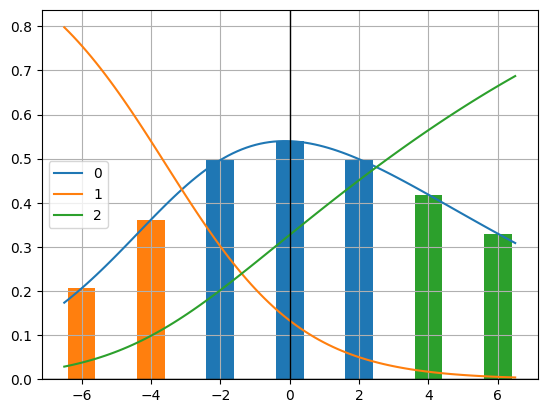

In [137]:
#Find the label with minimum cross-entropy

labels = model.predict_label(test_P)

print(labels)
fig, ax = plt.subplots()

cont_linspace=  torch.linspace(-6.5, 6.5, 100)

with torch.no_grad():
    colors = [f'C{i}' for i in labels]
    ax.bar(test_P, predicted_probabilities[:,0], color= colors)
    for i in range(3):
        ax.plot(cont_linspace, torch.softmax(model(cont_linspace), dim=1)[:,i], color=f'C{i}', label=f'{i}')
   
ax.grid()
coordinate_axes(ax)
ax.legend() 

<Axes: >

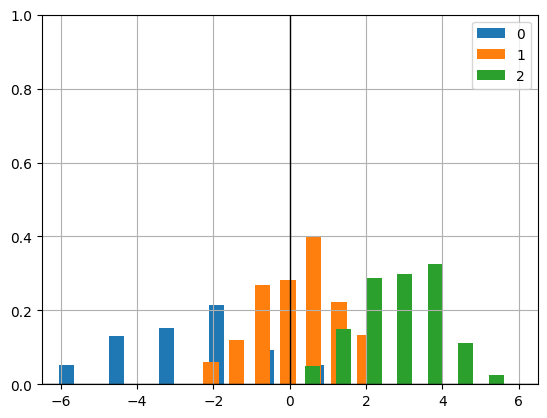

In [ ]:
N_points = 100

datas_0 = torch.randn(N_points) * 2 - 2
datas_1 = torch.randn(N_points) * 1 + 0.5
datas_2 = torch.randn(N_points) * 1 + 3

datas = torch.cat((datas_0, datas_1, datas_2))
labels = torch.cat((torch.zeros(N_points), torch.ones(N_points), 2*torch.ones(N_points)))

datas_dict = {0: datas_0, 1: datas_1, 2: datas_2}
datas = torch.cat((datas_0, datas_1, datas_2))
labels = torch.cat((torch.zeros(N_points), torch.ones(N_points), 2*torch.ones(N_points)))

data_tuples = torch.tensor([[(data_0, 0), (data_1, 1), (data_2, 2)] for data_0, data_1, data_2 in zip(datas_0, datas_1, datas_2)])
data_list = data_tuples.reshape(-1, 2)

fig, ax = plt.subplots()
for i in range(3):
    ax.hist(datas_dict[i], bins=7, alpha=1, label=f'{i}', width=0.4, align='mid', density=True)



ax.set(xlim = (-6.5, 6.5), ylim=(0, 1))
ax.legend()
ax.grid()
coordinate_axes(ax)

In [164]:
print(data_list[:,0])
print(datas)
print(labels)

tensor([-2.2589,  1.5668,  2.3289,  2.5992, -1.9412,  2.9245, -1.3336, -0.1909,
         2.6722, -2.3612, -0.8946,  2.6616, -3.6807,  0.2688,  4.0904, -2.8705,
         0.3531,  2.1615,  1.9009,  1.6036,  2.4863, -4.0476, -1.2248,  4.1809,
         0.2718, -0.0985,  3.7814, -1.7353,  0.1362,  5.1331, -2.1367,  0.3069,
         3.8542,  0.0134, -0.3402,  4.0023, -1.8494, -0.4410,  6.0207,  2.5429,
         0.3885,  1.9682, -0.5474,  1.9368,  1.7181, -1.5463,  1.3826,  3.5879,
        -1.5727,  0.3470,  2.2136, -4.3270, -1.2449,  2.6561, -0.3849,  1.7541,
         2.9500, -2.4153,  0.6531,  1.7382, -0.9757, -1.4856,  2.3854, -1.9683,
        -1.3257,  2.5395,  2.3794,  2.0873,  3.9916,  1.4428,  0.2142,  2.4743,
        -2.9638, -0.9940,  4.5759, -1.6695, -0.2696,  1.8536, -4.5304,  0.8849,
         3.9056, -3.4191,  1.2347,  4.1206, -0.1456,  0.7265,  3.2628, -1.5823,
         0.7584,  3.2256, -3.1571, -0.5173,  3.9374, -5.6763,  1.2910,  4.0538,
        -3.5223,  0.6500,  1.6408, -3.47

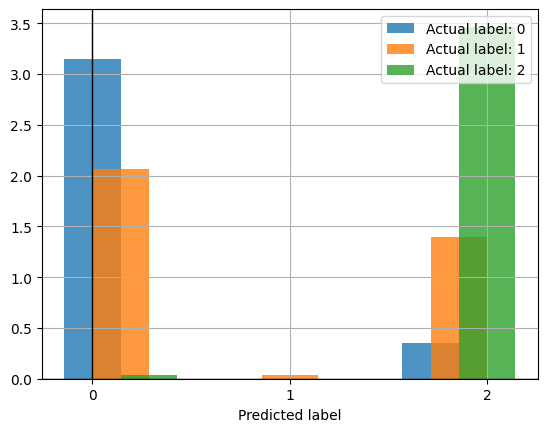

In [152]:


fig, ax = plt.subplots()

i = 0
prediction = model.predict_label(datas_dict[i])
ax.hist(prediction, bins=7, color=f'C{i}', label=f'Actual label: {i}', density = True, align='left', alpha = 0.8)

i = 1
prediction = model.predict_label(datas_dict[i])
ax.hist(prediction, bins=7, color=f'C{i}', label=f'Actual label: {i}', density = True, align='mid', alpha = 0.8)  

i = 2
prediction = model.predict_label(datas_dict[i])
ax.hist(prediction, bins=7, color=f'C{i}', label=f'Actual label: {i}', density = True, align='right', alpha = 0.8)



ax.grid()
coordinate_axes(ax)
ax.set_xticks(range(3))

ax.set_xlabel('Predicted label')

extra_legend = [plt.Rectangle((0,0),1,1,fc="w", edgecolor = 'none', linewidth=0)]*3

ax.legend(loc='upper right')


<Axes: >

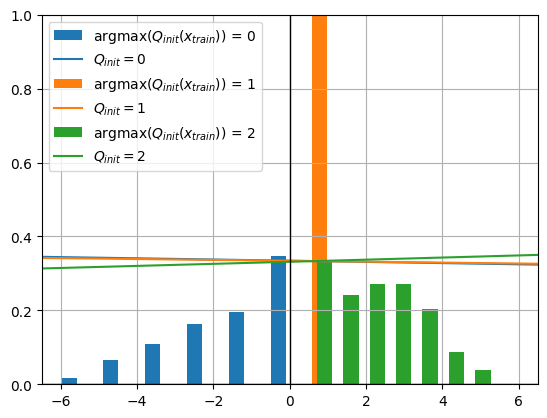

In [154]:
def guess_labels(model, datas):
    guess_0 = []
    guess_1 = []
    guess_2 = []

    for data in datas.values():
        
        for d in data:
            predicted_label = model.predict_label(d)
            if predicted_label == 0:
                guess_0.append(d)
            elif predicted_label == 1:
                guess_1.append(d)
            else:
                guess_2.append(d)


    guesses = {0: guess_0, 1: guess_1, 2: guess_2}

    return guesses


guesses = guess_labels(model, datas_dict)
fig, ax = plt.subplots()
for i in range(3):
    ax.hist(guesses[i], bins=7, alpha=1, label=r'argmax($Q_{init}(x_{train})$) = ' + f'{i}', width=0.4, align='mid', density=True, color=f'C{i}')

    with torch.no_grad():
         ax.plot(cont_linspace, torch.softmax(model(cont_linspace), dim=1)[:,i], color=f'C{i}', label=r'$Q_{init} = $' + f'{i}')


ax.set(xlim = (-6.5, 6.5), ylim=(0, 1))
ax.legend()
ax.grid()
coordinate_axes(ax)
        

In [155]:
criterion = torch.nn.CrossEntropyLoss()

datas = torch.cat((datas_0, datas_1, datas_2))
n_epochs = 1000
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in zip(range(n_epochs)):
    optimizer.zero_grad()
    predicted_weights = model(datas)
    label = torch.tensor(data_list[:,1].clone().detach(), dtype = int)
    loss = criterion(predicted_weights, label)
    loss.backward()
    optimizer.step()


C:\Users\tobia\AppData\Local\Temp\ipykernel_17980\950371793.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(data_list[:,1].clone().detach(), dtype = int)


<Axes: >

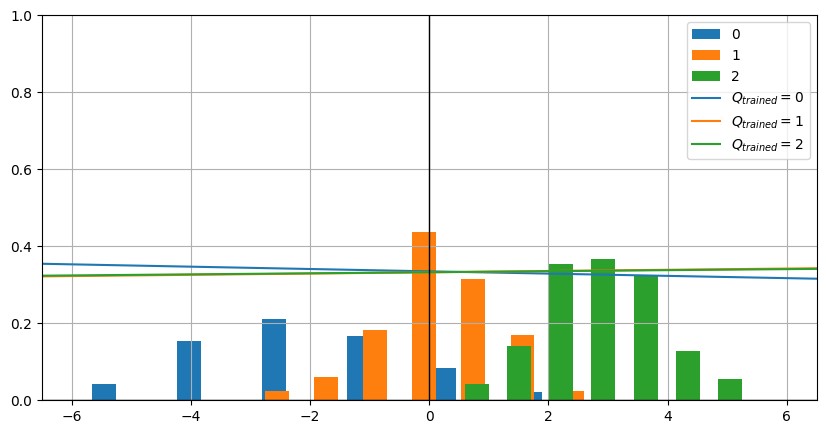

In [156]:
fig, ax = plt.subplots(figsize = (10,5))

#guesses = guess_labels(model, datas)

cont_linspace = torch.linspace(-6.5, 6.5, 1000)


for i in range(3):
    ax.hist(datas_dict[i], bins=7, alpha=1, label=f'{i}', width=0.4, align='mid', density=True)
    #ax.hist(guesses[i], bins=7, alpha=0.5, label=r'argmax($Q_{trained}(x_{train})$) = ' + f'{i}', width=0.4, align='mid', density=True, color=f'C{i}')

with torch.no_grad():
    for i in range(3):
            ax.plot(cont_linspace, torch.softmax(model(cont_linspace), dim=1)[:,i], color=f'C{i}', label=r'$Q_{trained} = $' + f'{i}')

ax.set(xlim = (-6.5, 6.5), ylim=(0, 1))
ax.legend()
ax.grid()
coordinate_axes(ax)



C:\Users\tobia\AppData\Local\Temp\ipykernel_17980\2779899048.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels_list, dtype = int)


Epoch 0, loss: 1.1398930549621582
Epoch 100, loss: 0.5438647270202637
Epoch 200, loss: 0.5108592510223389
Epoch 300, loss: 0.49710628390312195
Epoch 400, loss: 0.48971953988075256
Epoch 500, loss: 0.48523977398872375
Epoch 600, loss: 0.4823203980922699
Epoch 700, loss: 0.4803238809108734
Epoch 800, loss: 0.4789101183414459
Epoch 900, loss: 0.4778822362422943
Optimization finished with loss:  0.4771261215209961


<Axes: >

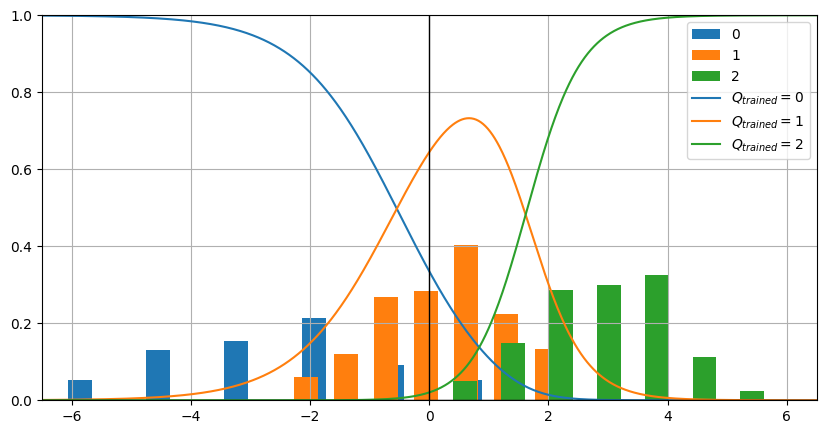

In [ ]:


N_points = 100

datas_0 = torch.randn(N_points) * 2 - 2
datas_1 = torch.randn(N_points) * 1 + 0.5
datas_2 = torch.randn(N_points) * 1 + 3

datas = torch.stack((datas_0, datas_1, datas_2), dim=1).flatten()
labels = torch.cat((torch.zeros(N_points), torch.ones(N_points), 2 * torch.ones(N_points))).view(3, -1).T.flatten()

model = Model()
model.fc1.weight.data[...] = torch.Tensor([[0.7], [0.25], [0.9]])

model.fit(1000, datas, labels)


fig, ax = plt.subplots(figsize = (10,5))



cont_linspace = torch.linspace(-6.5, 6.5, 1000)


for i in range(3):
    ax.hist(datas_dict[i], bins=7, alpha=1, label=f'{i}', width=0.4, align='mid', density=True)
   

with torch.no_grad():
    for i in range(3):
            ax.plot(cont_linspace, torch.softmax(model(cont_linspace), dim=1)[:,i], color=f'C{i}', label=r'$Q_{trained} = $' + f'{i}')

ax.set(xlim = (-6.5, 6.5), ylim=(0, 1))
ax.legend()
ax.grid()
coordinate_axes(ax)



In [145]:
print(datas)
print(data_list[:,0])

tensor([-2.2180e+00, -1.7310e+00, -1.3785e+00, -4.2085e+00, -1.6841e+00,
        -2.2019e+00, -8.4639e-01, -8.4406e-01, -6.0780e-01, -2.2178e+00,
         6.3207e-01, -1.0210e-01,  6.9986e-02, -1.7131e+00, -1.6165e-01,
        -6.3936e+00, -2.1210e+00, -9.1834e-01, -6.6401e+00, -1.1084e-03,
        -1.3293e+00,  9.4592e-01, -2.3401e+00, -1.0621e+00, -1.9210e+00,
        -1.6063e+00, -2.8327e+00,  1.1006e+00, -8.7718e-01, -2.9645e+00,
        -1.0246e-01, -6.5925e+00, -2.5547e+00, -1.2212e+00, -3.7624e-01,
        -5.6606e+00, -1.9627e-01, -3.3869e+00, -2.3107e+00, -1.3305e+00,
        -5.0189e+00, -9.0771e-01, -2.1012e+00, -2.9552e+00, -5.4803e+00,
        -1.1753e+00, -2.3890e+00,  1.5400e+00, -3.4963e+00, -2.0831e+00,
        -1.0408e+00, -2.8920e+00,  1.2241e+00, -3.7232e+00,  1.5896e-01,
        -3.6406e+00, -2.4089e+00, -3.4542e+00,  2.2555e+00, -1.0191e+00,
        -1.4847e+00, -8.1758e-01, -1.9856e+00, -4.9621e+00, -2.3768e+00,
         1.0165e+00, -2.7434e+00, -2.5823e+00, -4.4

<Axes: >

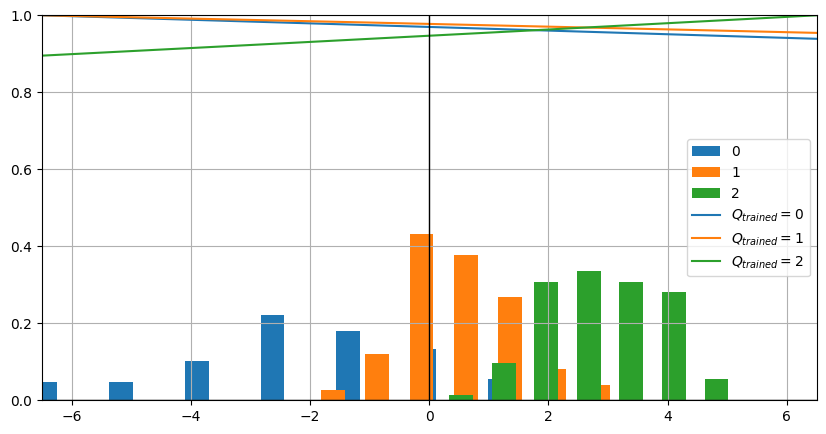

In [146]:
fig, ax = plt.subplots(figsize = (10,5))

#guesses = guess_labels(model, datas)

cont_linspace = torch.linspace(-6.5, 6.5, 1000)


for i in range(3):
    ax.hist(datas_dict[i], bins=7, alpha=1, label=f'{i}', width=0.4, align='mid', density=True)
    #ax.hist(guesses[i], bins=7, alpha=0.5, label=r'argmax($Q_{trained}(x_{train})$) = ' + f'{i}', width=0.4, align='mid', density=True, color=f'C{i}')

with torch.no_grad():
    for i in range(3):
            ax.plot(cont_linspace, torch.softmax(model(cont_linspace), dim=1)[:,i]/torch.max(torch.softmax(model(cont_linspace), dim=1)[:,i]), color=f'C{i}', label=r'$Q_{trained} = $' + f'{i}')

ax.set(xlim = (-6.5, 6.5), ylim=(0, 1))
ax.legend()
ax.grid()
coordinate_axes(ax)

